In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import acquire as a
import prepare as p
import env

In [18]:
def get_connection(db):
    return f'mysql+pymysql://{env.user}:{env.password}@{env.host}/{db}'


In [20]:
query = """
        SELECT sale_id, sale_date, store_id, item_id, sale_amount, item_brand, 
        item_name, item_price, store_address, store_zipcode, store_city, store_state
        FROM sales
        JOIN items USING(item_id)
        JOIN stores USING (store_id);
        """
df = pd.read_sql(query, get_connection('tsa_item_demand'))

In [21]:
store_df = df

In [22]:
store_df.head()

,sale_id,sale_date,store_id,item_id,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
0,1,2013-01-01,1,1,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,2,2013-01-02,1,1,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,3,2013-01-03,1,1,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,4,2013-01-04,1,1,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,5,2013-01-05,1,1,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [23]:
store_df = p.prep_store(store_df)

In [24]:
store_df.head()


,sale_id,store_id,item_id,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,
2013-01-01,1,1,1,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,295813,3,17,26,Ducal,Ducal Refried Red Beans,1.16,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,30.16
2013-01-01,125995,10,7,32,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,8503 NW Military Hwy,78231,San Antonio,TX,January,Tuesday,308.48
2013-01-01,314073,3,18,45,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,197.55
2013-01-01,332333,3,19,34,Careone,Careone Family Comb Set - 8 Ct,0.74,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,25.16


In [25]:
train_len = int(0.6 * len(store_df))
val_test_split = int(0.8 * len(store_df))
train_len, val_test_split

(547800, 730400)

In [26]:
train = store_df.iloc[:train_len]
val = store_df.iloc[train_len:val_test_split]
test = store_df.iloc[val_test_split:]
train.shape, val.shape, test.shape

((547800, 14), (182600, 14), (182600, 14))

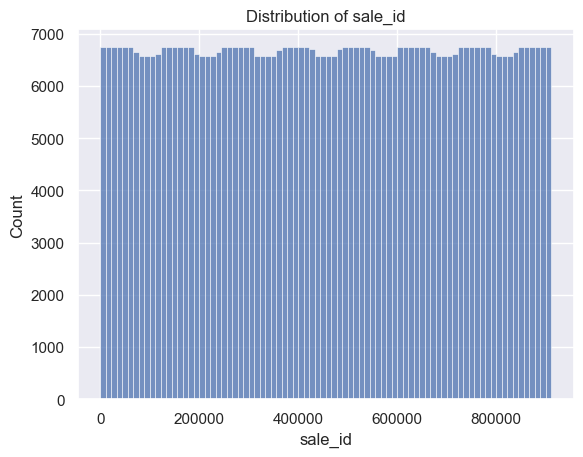

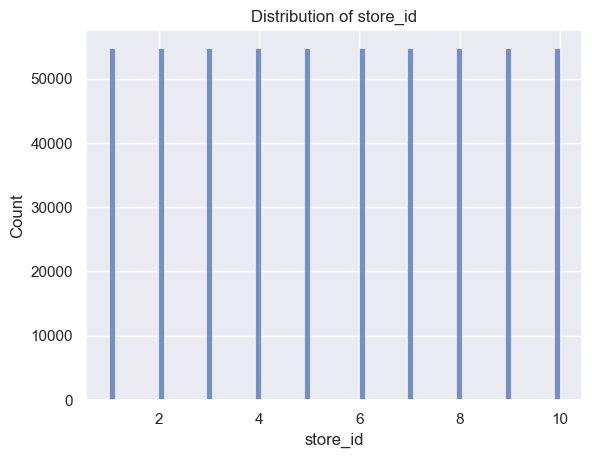

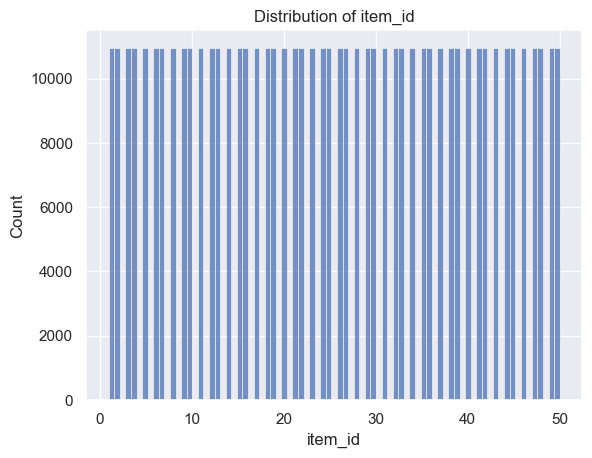

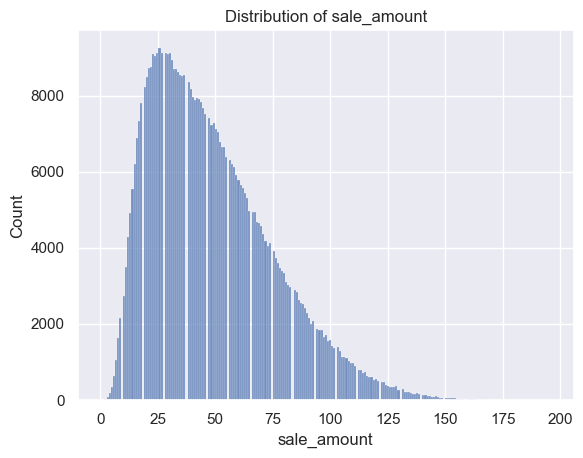

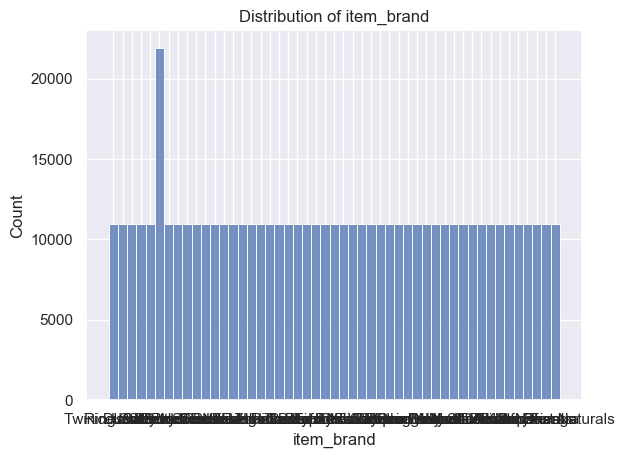

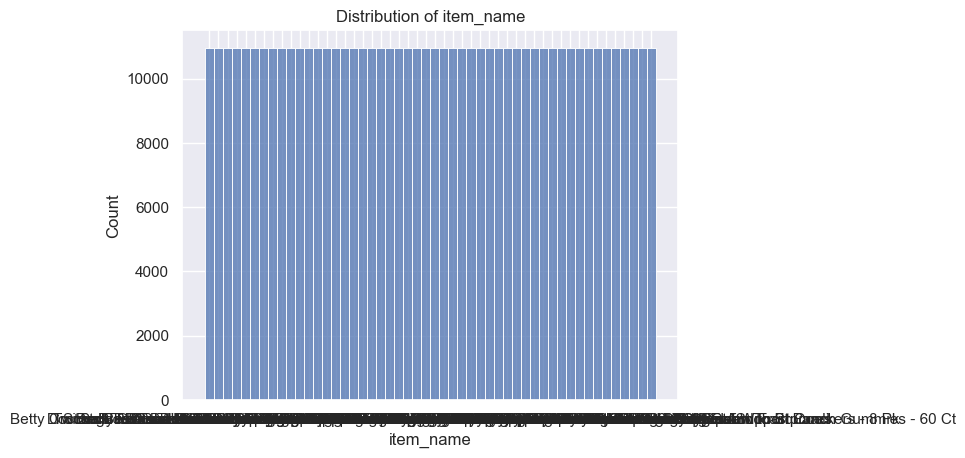

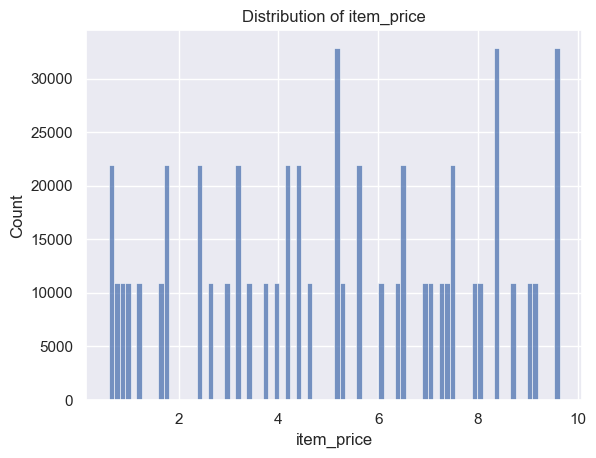

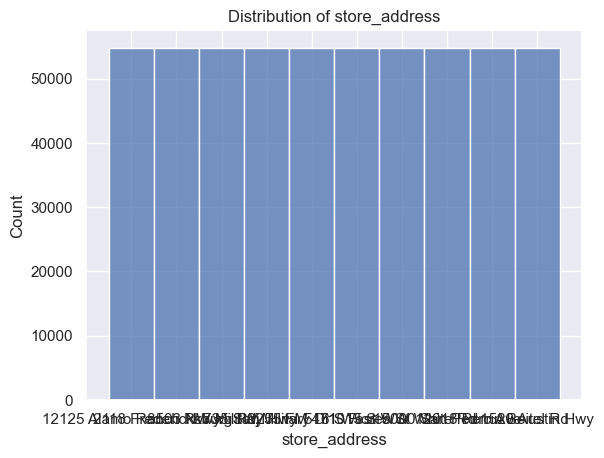

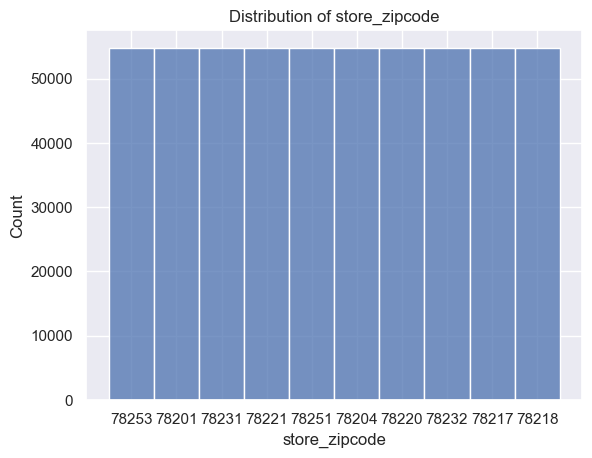

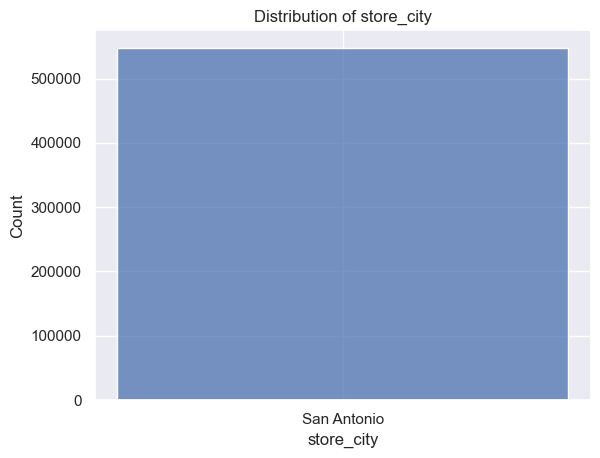

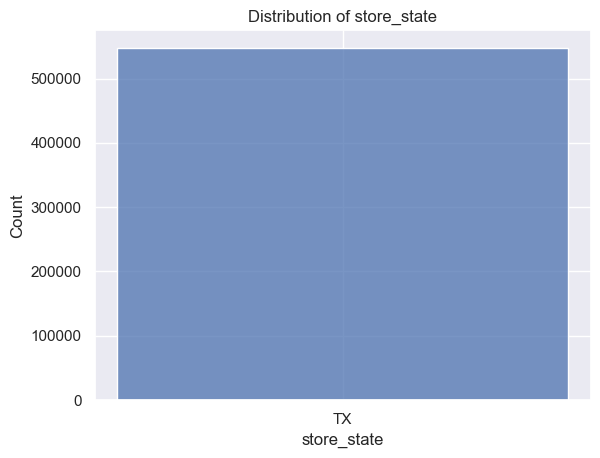

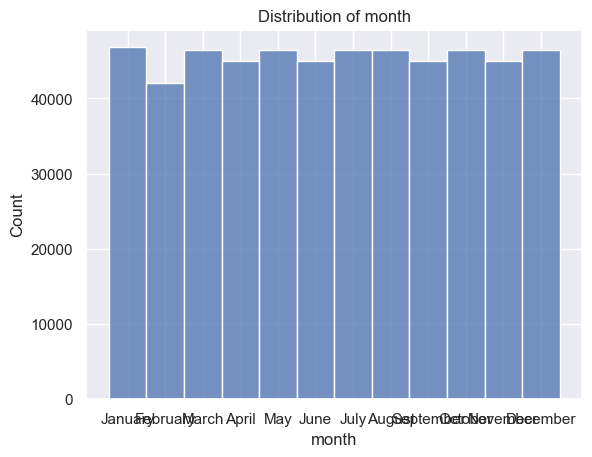

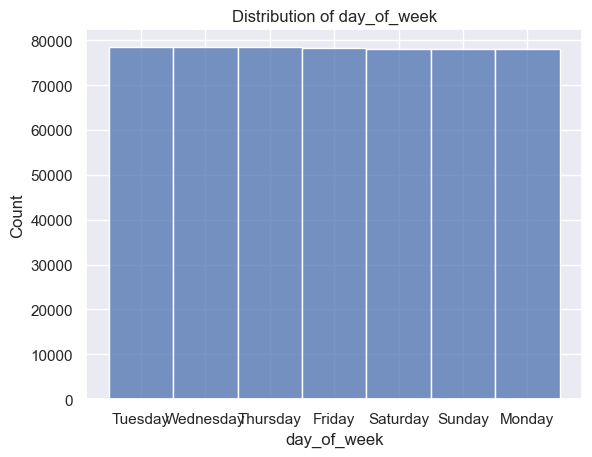

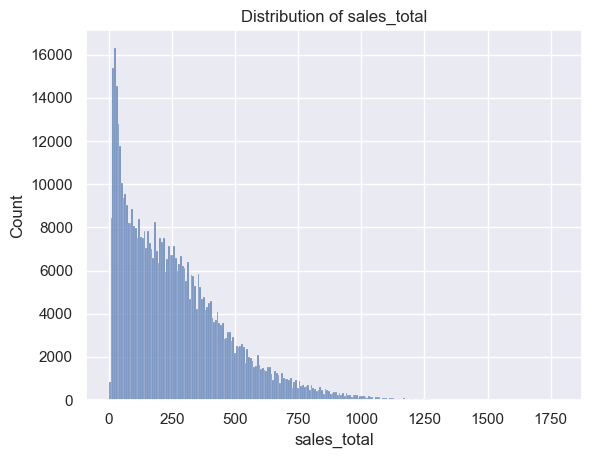

In [27]:
p.plot_distributions(train)


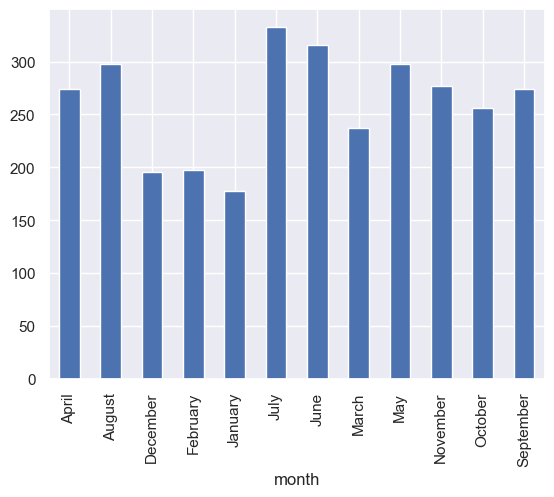

In [29]:
train.groupby('month')['sales_total'].mean().plot.bar()
plt.show()

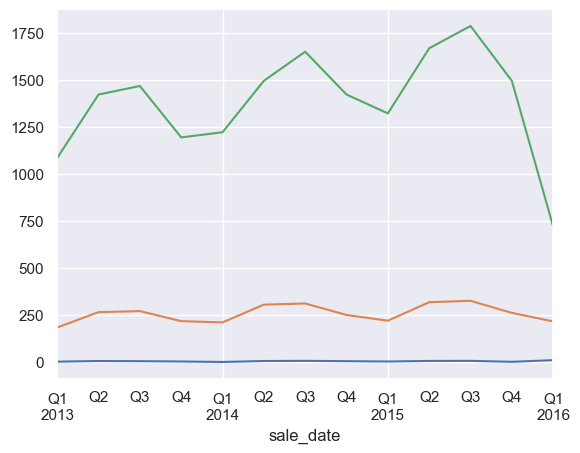

In [30]:
train.resample('Q').min()['sales_total'].plot()
train.resample('Q').mean()['sales_total'].plot()
train.resample('Q').max()['sales_total'].plot()
plt.show()

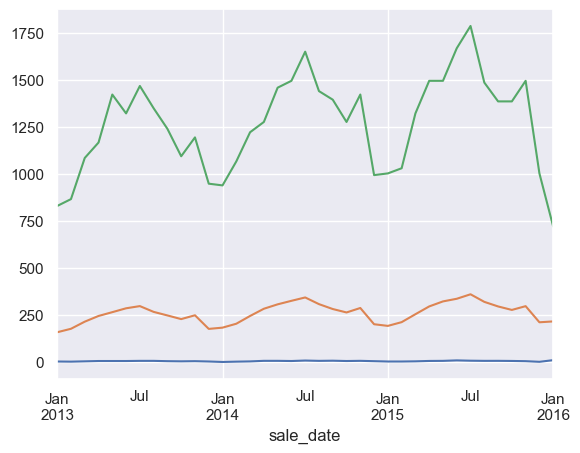

In [31]:
train.resample('M').min()['sales_total'].plot()
train.resample('M').mean()['sales_total'].plot()
train.resample('M').max()['sales_total'].plot()
plt.show()

In [33]:
week_mean = train.resample('W').mean()
week_mean

,sale_id,store_id,item_id,sale_amount,item_price,sales_total
sale_date,,,,,,
2013-01-06,455590.500000,5.500000,25.500000,30.355667,5.160400,163.589167
2013-01-13,455597.000000,5.500000,25.500000,29.686286,5.160400,159.981203
2013-01-20,455604.000000,5.500000,25.500000,29.414286,5.160400,157.946720
2013-01-27,455611.000000,5.500000,25.500000,29.513714,5.160400,158.545383
2013-02-03,455618.000000,5.500000,25.500000,31.150571,5.160400,167.585014
...,...,...,...,...,...,...
2015-12-06,456654.000000,5.500000,25.500000,41.171143,5.160400,221.695289
2015-12-13,456661.000000,5.500000,25.500000,39.317143,5.160400,211.503734
2015-12-20,456668.000000,5.500000,25.500000,39.510286,5.160400,212.435217


In [35]:
week_mean['shifted'] = week_mean['sales_total'].shift(-1)

week_mean

,sale_id,store_id,item_id,sale_amount,item_price,sales_total,shifted
sale_date,,,,,,,
2013-01-06,455590.500000,5.500000,25.500000,30.355667,5.160400,163.589167,159.981203
2013-01-13,455597.000000,5.500000,25.500000,29.686286,5.160400,159.981203,157.946720
2013-01-20,455604.000000,5.500000,25.500000,29.414286,5.160400,157.946720,158.545383
2013-01-27,455611.000000,5.500000,25.500000,29.513714,5.160400,158.545383,167.585014
2013-02-03,455618.000000,5.500000,25.500000,31.150571,5.160400,167.585014,176.455603
...,...,...,...,...,...,...,...
2015-12-06,456654.000000,5.500000,25.500000,41.171143,5.160400,221.695289,211.503734
2015-12-13,456661.000000,5.500000,25.500000,39.317143,5.160400,211.503734,212.435217
2015-12-20,456668.000000,5.500000,25.500000,39.510286,5.160400,212.435217,211.800551


Text(0, 0.5, 'Sales Tomorrow')

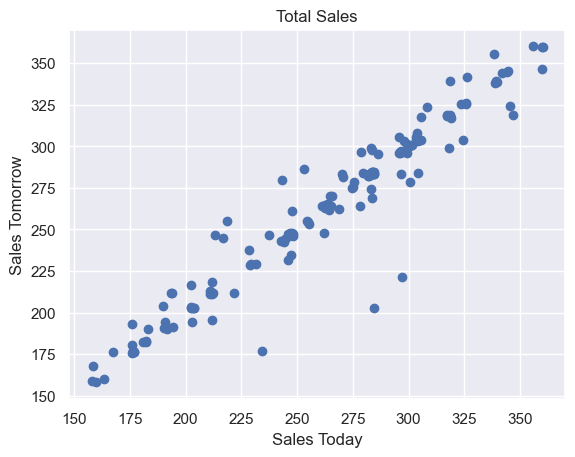

In [36]:
plt.scatter(week_mean['sales_total'], week_mean['shifted'])
plt.title('Total Sales')
plt.xlabel('Sales Today')
plt.ylabel('Sales Tomorrow')


In [37]:
week_mean['half_year'] = week_mean['sales_total'].shift(-26)
week_mean.head()

,sale_id,store_id,item_id,sale_amount,item_price,sales_total,shifted,half_year
sale_date,,,,,,,,
2013-01-06,455590.5,5.5,25.5,30.355667,5.1604,163.589167,159.981203,299.209394
2013-01-13,455597.0,5.5,25.5,29.686286,5.1604,159.981203,157.946720,301.578849
2013-01-20,455604.0,5.5,25.5,29.414286,5.1604,157.946720,158.545383,300.565134
2013-01-27,455611.0,5.5,25.5,29.513714,5.1604,158.545383,167.585014,300.484531
2013-02-03,455618.0,5.5,25.5,31.150571,5.1604,167.585014,176.455603,278.376257


Text(0, 0.5, 'Sales In Half Year')

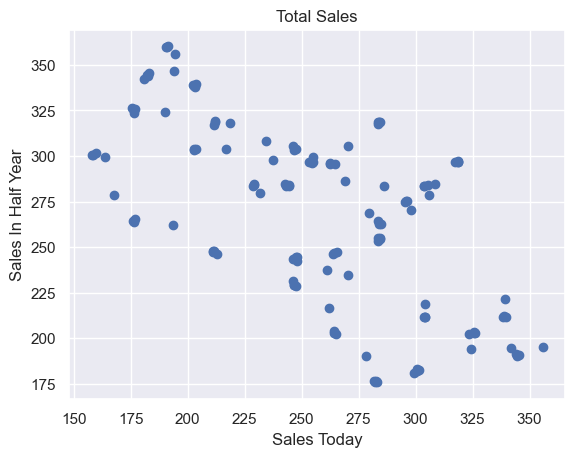

In [38]:
plt.scatter(week_mean['sales_total'], week_mean['half_year'])
plt.title('Total Sales')
plt.xlabel('Sales Today')
plt.ylabel('Sales In Half Year')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

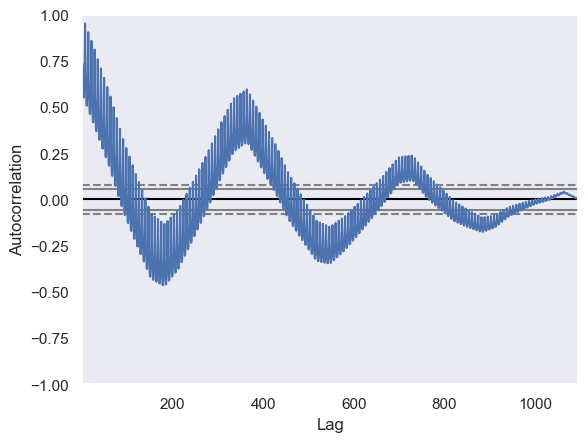

In [39]:
pd.plotting.autocorrelation_plot(train['sales_total'].resample('D').mean())


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

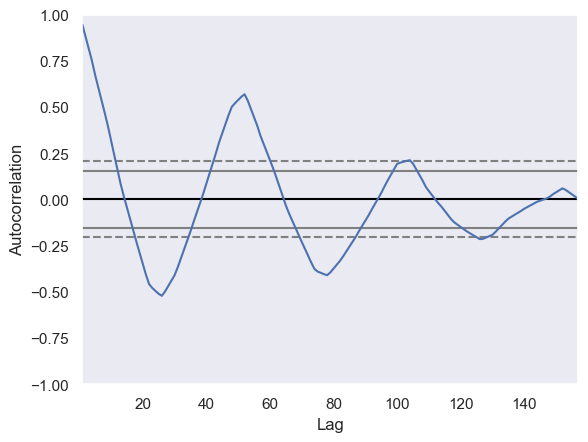

In [40]:
pd.plotting.autocorrelation_plot(train['sales_total'].resample('W').mean())


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

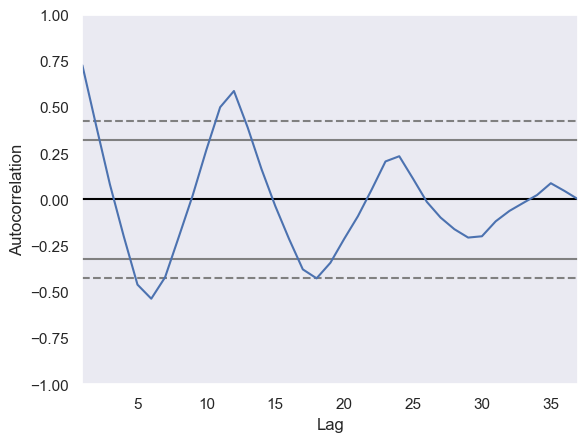

In [41]:
pd.plotting.autocorrelation_plot(train['sales_total'].resample('M').mean())


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

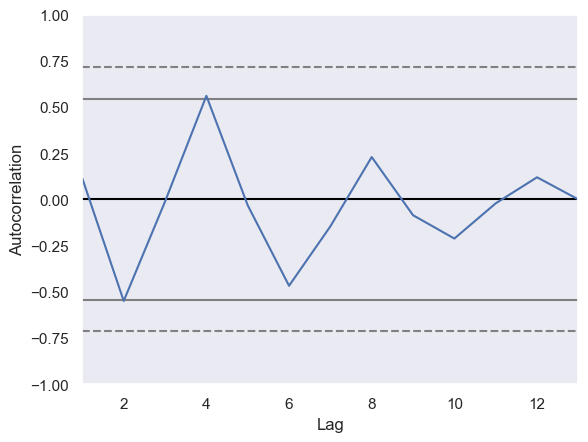

In [42]:
pd.plotting.autocorrelation_plot(train['sales_total'].resample('Q').mean())


In [43]:
germany = a.get_germany_data()


In [44]:
germany = p.prep_germany_data(germany)
germany.head()

,consumption,wind,solar,wind_solar,month,day_of_week,year
Date,,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,Sunday,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,Monday,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,Tuesday,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,Wednesday,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,Thursday,2006


In [45]:
train_len = int(0.6 * len(germany))
val_test_split = int(0.8 * len(germany))
train_len, val_test_split

(2629, 3506)

In [46]:
train = germany.iloc[:train_len]
val = germany.iloc[train_len:val_test_split]
test = germany.iloc[val_test_split:]
train.shape, val.shape, test.shape

((2629, 7), (877, 7), (877, 7))

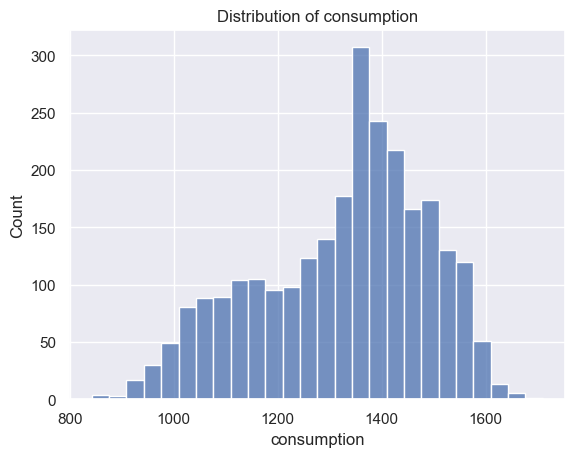

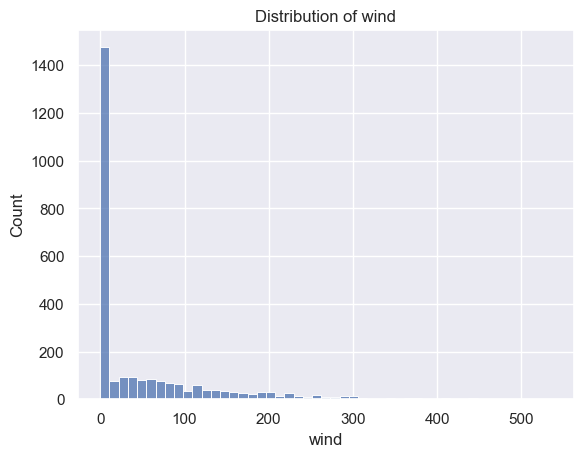

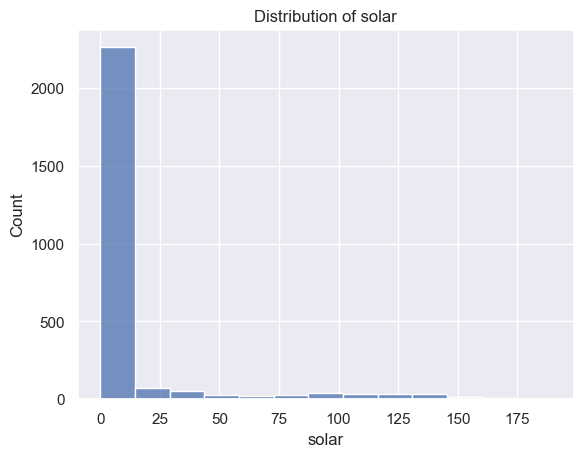

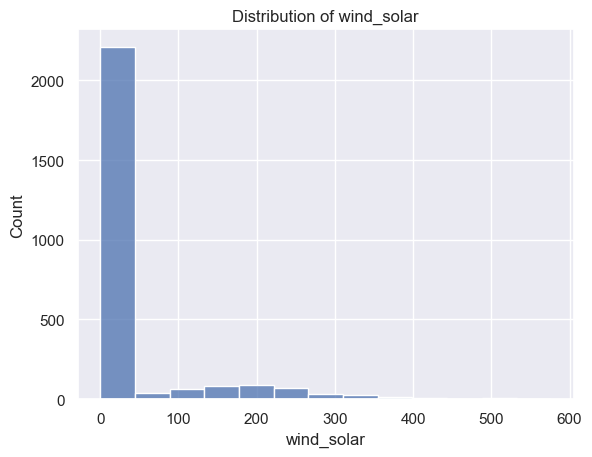

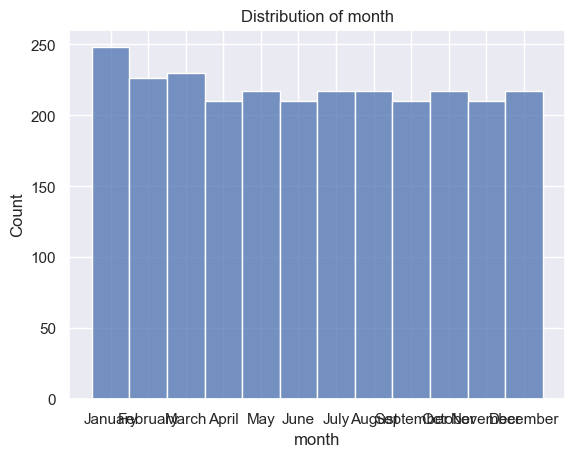

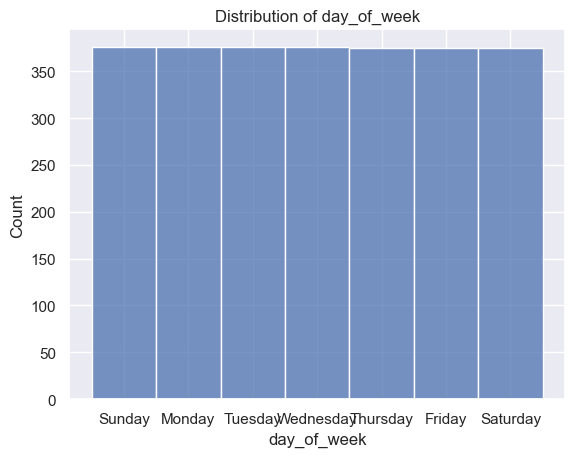

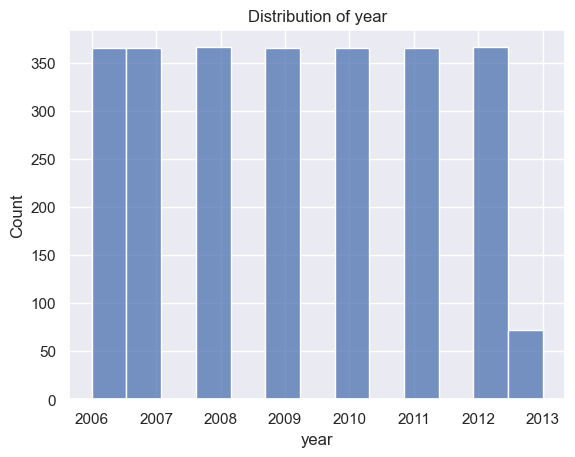

In [47]:
p.plot_distributions(train)

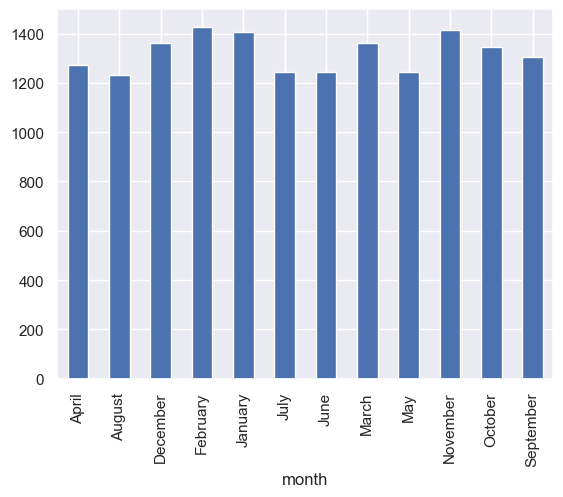

<AxesSubplot:xlabel='Date'>

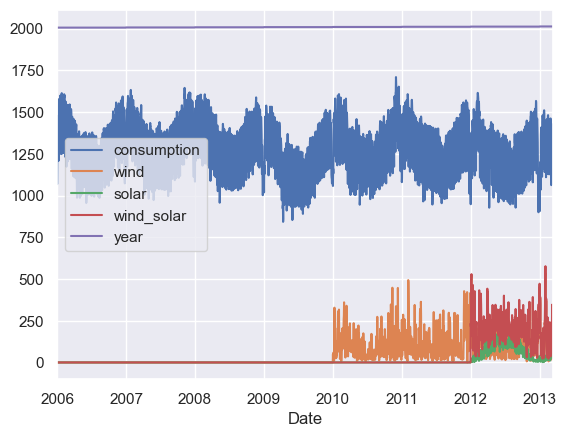

In [49]:
train.groupby('month')['consumption'].mean().plot.bar()
plt.show()
train.plot()

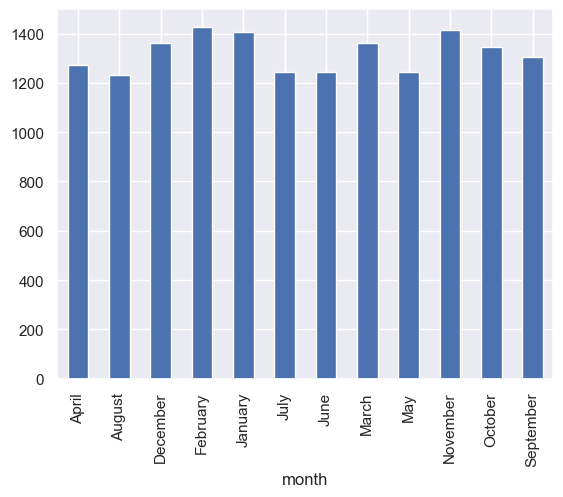

<AxesSubplot:xlabel='Date'>

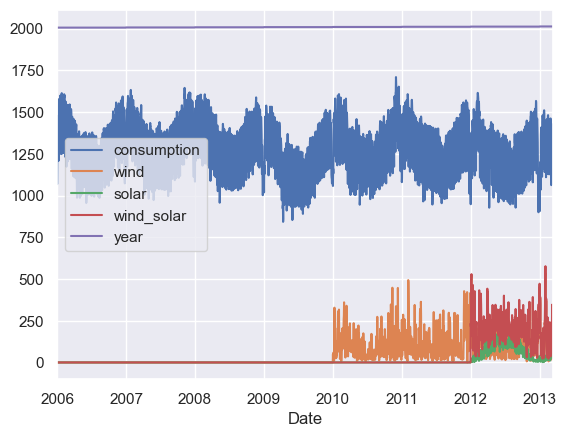

In [49]:
train.groupby('month')['consumption'].mean().plot.bar()
plt.show()
train.plot()

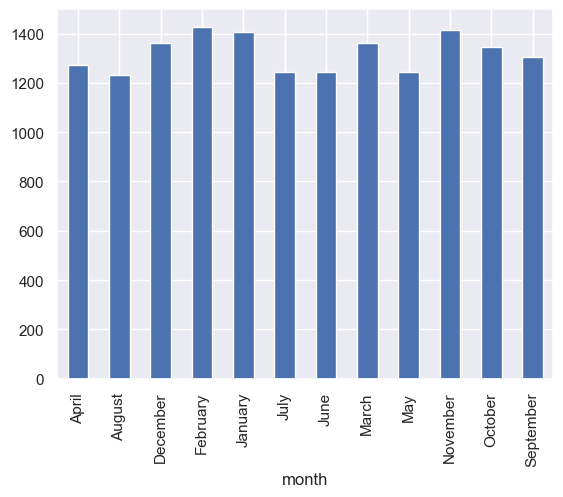

In [50]:
train.groupby('month')['consumption'].mean().plot.bar()
plt.show()

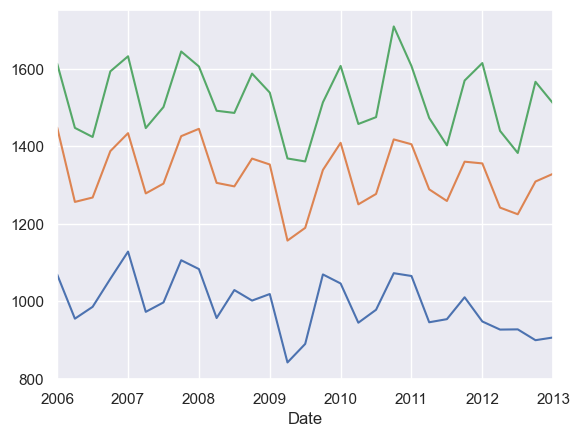

In [51]:
train.resample('Q').min()['consumption'].plot()
train.resample('Q').mean()['consumption'].plot()
train.resample('Q').max()['consumption'].plot()
plt.show()


In [53]:
week_mean['shifted'] = week_mean['consumption'].shift(-1)

week_meanweek_mean = train.resample('W').mean()
week_mean

,consumption,wind,solar,wind_solar,year,shifted
Date,,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,2006.0,1381.300143
2006-01-08,1381.300143,0.000000,0.000000,0.000000,2006.0,1486.730286
2006-01-15,1486.730286,0.000000,0.000000,0.000000,2006.0,1490.031143
2006-01-22,1490.031143,0.000000,0.000000,0.000000,2006.0,1514.176857
2006-01-29,1514.176857,0.000000,0.000000,0.000000,2006.0,1501.403286
...,...,...,...,...,...,...
2013-02-17,1367.142143,68.448714,25.797571,94.246286,2013.0,1348.114857
2013-02-24,1348.114857,126.143571,24.747857,150.891429,2013.0,1333.157143
2013-03-03,1333.157143,79.604143,39.010571,118.614714,2013.0,1288.966000


In [53]:
week_mean['shifted'] = week_mean['consumption'].shift(-1)

week_meanweek_mean = train.resample('W').mean()
week_mean

,consumption,wind,solar,wind_solar,year,shifted
Date,,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,2006.0,1381.300143
2006-01-08,1381.300143,0.000000,0.000000,0.000000,2006.0,1486.730286
2006-01-15,1486.730286,0.000000,0.000000,0.000000,2006.0,1490.031143
2006-01-22,1490.031143,0.000000,0.000000,0.000000,2006.0,1514.176857
2006-01-29,1514.176857,0.000000,0.000000,0.000000,2006.0,1501.403286
...,...,...,...,...,...,...
2013-02-17,1367.142143,68.448714,25.797571,94.246286,2013.0,1348.114857
2013-02-24,1348.114857,126.143571,24.747857,150.891429,2013.0,1333.157143
2013-03-03,1333.157143,79.604143,39.010571,118.614714,2013.0,1288.966000


Text(0, 0.5, 'Consumption Tomorrow')

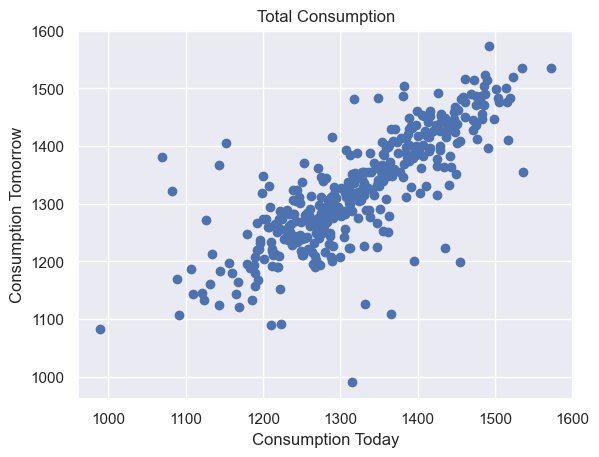

In [54]:
plt.scatter(week_mean['consumption'], week_mean['shifted'])
plt.title('Total Consumption')
plt.xlabel('Consumption Today')
plt.ylabel('Consumption Tomorrow')

In [55]:
week_mean['half_year'] = week_mean['consumption'].shift(-26)
week_mean.head()

,consumption,wind,solar,wind_solar,year,shifted,half_year
Date,,,,,,,
2006-01-01,1069.184000,0.0,0.0,0.0,2006.0,1381.300143,1254.896857
2006-01-08,1381.300143,0.0,0.0,0.0,2006.0,1486.730286,1279.510571
2006-01-15,1486.730286,0.0,0.0,0.0,2006.0,1490.031143,1260.945286
2006-01-22,1490.031143,0.0,0.0,0.0,2006.0,1514.176857,1261.179714
2006-01-29,1514.176857,0.0,0.0,0.0,2006.0,1501.403286,1263.756571


Text(0, 0.5, 'Consumption In Half Year')

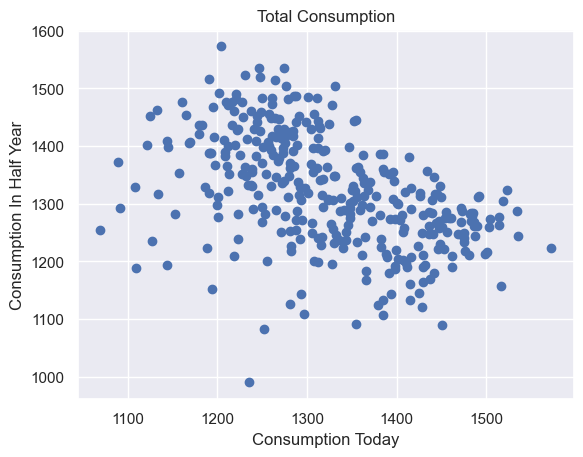

In [56]:
plt.scatter(week_mean['consumption'], week_mean['half_year'])
plt.title('Total Consumption')
plt.xlabel('Consumption Today')
plt.ylabel('Consumption In Half Year')


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

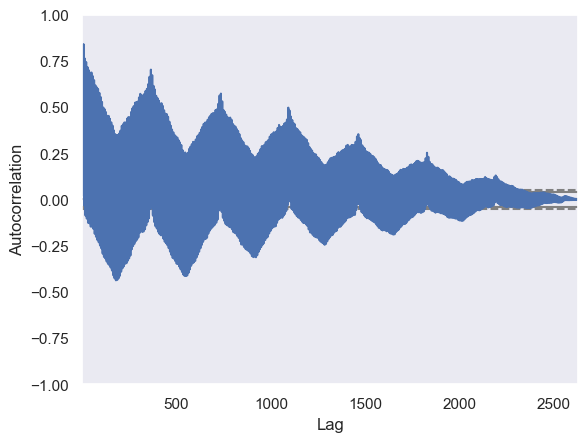

In [57]:
pd.plotting.autocorrelation_plot(train['consumption'].resample('D').mean())


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

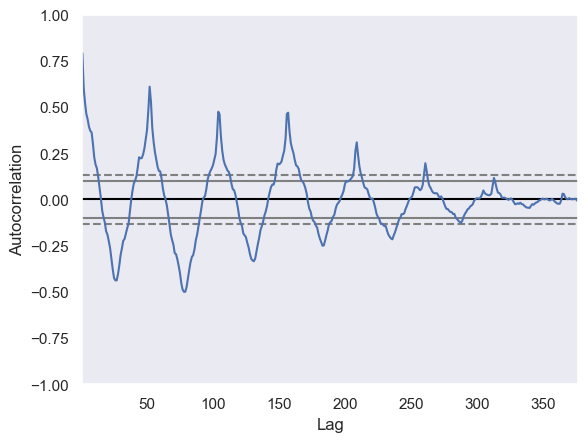

In [58]:
pd.plotting.autocorrelation_plot(train['consumption'].resample('W').mean())


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

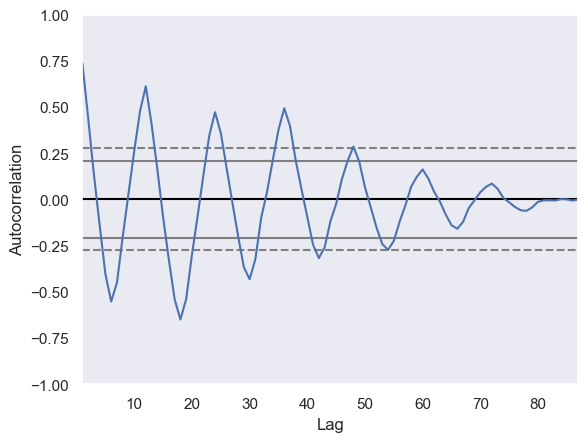

In [59]:
pd.plotting.autocorrelation_plot(train['consumption'].resample('M').mean())


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

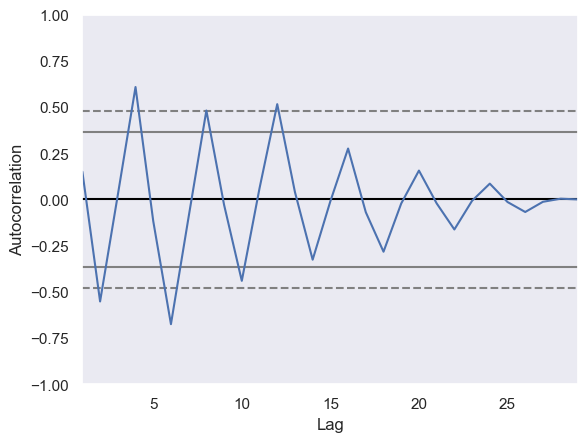

In [60]:
pd.plotting.autocorrelation_plot(train['consumption'].resample('Q').mean())


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

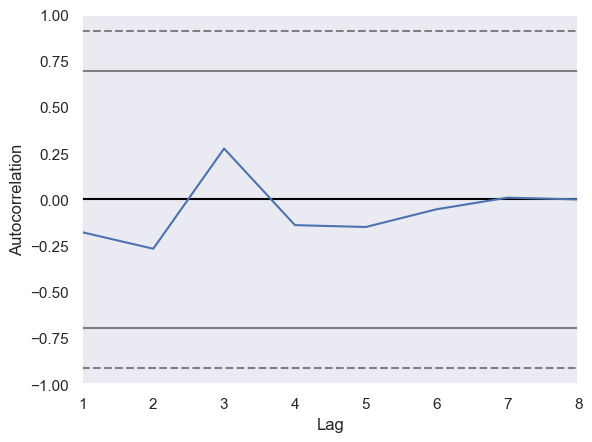

In [61]:
pd.plotting.autocorrelation_plot(train['consumption'].resample('Y').mean())
